Loading data...
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8982 training sequences
2246 test sequences
Number of classes: 46
Padding sequences to length 100...
Data shapes after preprocessing:
x_train shape: (8982, 100)
y_train shape: (8982, 46)
Building the Bidirectional LSTM model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3573 - loss: 3.0154 - val_accuracy: 0.4983 - val_loss: 1.9385
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5578 - loss: 1.7445 - val_accuracy: 0.5795 - val_loss: 1.7207
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6150 - loss: 1.5550 - val_accuracy: 0.6151 - val_loss: 1.6461
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6513 - loss: 1.4185 - val_accuracy: 0.6274 - val_loss: 1.5529
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6778 - loss: 1.3253 - val_accuracy: 0.6463 - val_loss: 1.4997
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7205 - loss: 1.1537 - val_accuracy: 0.6463 - val_loss: 1.4714
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7504 - loss: 1.0037 - val_accuracy: 0.6529 - val_loss: 1.5545
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7657 - loss: 0.925

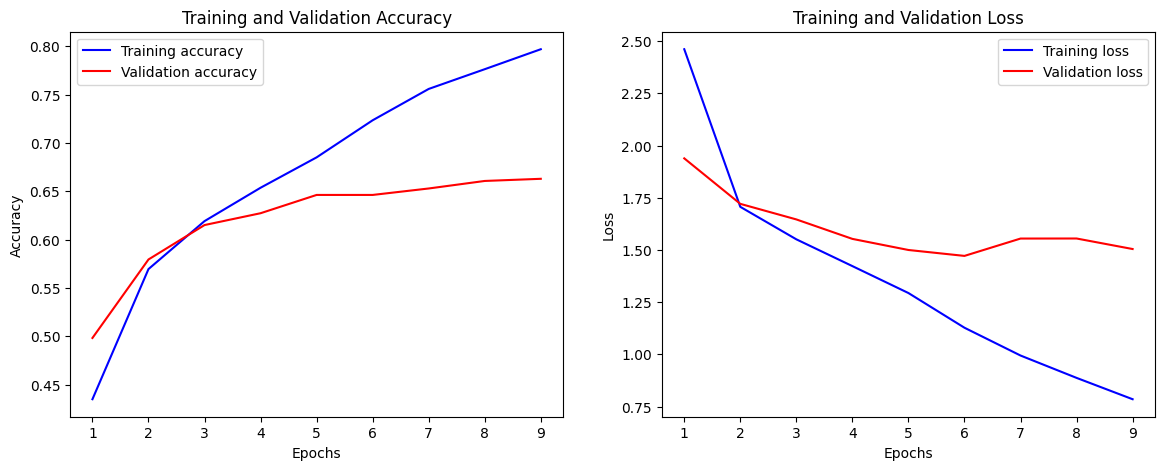

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

--- Sample Prediction ---
Sample Newswire (Partial Decoded): ? shr 12 cts vs 15 cts net 282 000 vs 360 000 revs 5 261 000 vs 5 348 000 avg shrs 2 336 000 vs 2 335 000 year shr 91 cts vs 1 04 dlrs net 2 149 000 v...
True Topic Index: 3
Predicted Topic Index: 3


In [5]:
# Deep Learning Assignment - Recurrent Neural Network (RNN) using LSTM
# Task: Multi-Class Text Classification on Reuters Newswire Dataset (46 Topics)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# --- Configuration ---
# Only consider the top 10,000 most frequently occurring words
MAX_WORDS = 10000
# Max length for news wire sequences (reviews will be padded/truncated to this length)
MAX_LEN = 100
# Dimension of the word embeddings
EMBEDDING_DIM = 64
# Total number of output classes (46 topics in Reuters dataset)
NUM_CLASSES = 46

# --- 1. Load the Dataset ---
print("Loading data...")
# The data is pre-processed: sequences of integers where each integer is a word index.
(x_train, y_train), (x_test, y_test) = reuters.load_data(
    num_words=MAX_WORDS,
    test_split=0.2
)

# Load the raw data before padding to use for decoding later
(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = reuters.load_data(num_words=MAX_WORDS, test_split=0.2)
original_test_data = raw_x_test


print(f"{len(x_train)} training sequences")
print(f"{len(x_test)} test sequences")
print(f"Number of classes: {NUM_CLASSES}")

# --- 2. Data Preprocessing (Padding and One-Hot Encoding) ---

# Pad sequences to ensure all inputs have the same length (MAX_LEN)
# 'post' padding means padding zeros at the end of the sequence.
print(f"Padding sequences to length {MAX_LEN}...")
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post')

# Convert integer labels to one-hot encoding for multi-class classification
# Required for 'categorical_crossentropy' loss
y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

print("Data shapes after preprocessing:")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


# --- 3. Build the RNN (LSTM) Model ---
print("Building the Bidirectional LSTM model...")
model = Sequential([
    # 1. Embedding Layer: Converts integer word indices into dense vectors
    # input_dim=MAX_WORDS (vocabulary size)
    # output_dim=EMBEDDING_DIM (size of the dense vector for each word)
    # input_length=MAX_LEN (length of input sequences)
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),

    # 2. Bidirectional LSTM Layer: Processes the sequence in both forward and backward directions
    # This helps the model capture context from both sides of a word in the sentence.
    Bidirectional(LSTM(64)), # Output will be a 2D tensor (batch_size, units)

    # 3. Dense Layers: Standard feed-forward layers for classification
    Dense(64, activation='relu'),

    # 4. Output Layer:
    # Output size is NUM_CLASSES (46 topics)
    # Softmax activation is used for multi-class probability distribution
    Dense(NUM_CLASSES, activation='softmax')
])

# --- 4. Compile the Model ---
# Use 'adam' optimizer and 'categorical_crossentropy' loss for multi-class classification
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- 5. Train the Model ---
# Use Early Stopping to prevent overfitting, monitoring validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print("\nStarting model training...")
history = model.fit(
    x_train,
    y_train,
    epochs=20, # Set a reasonably high number of epochs, EarlyStopping will stop it
    batch_size=128,
    validation_split=0.1, # Use 10% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

# --- 6. Evaluate the Model ---
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- 7. Plotting Results (Recommended for Colab) ---
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Use plt.show() if running in a standard Python environment or script
    # For Colab, the plots will appear inline without plt.show()
    plt.show()

# Run the plotting function
plot_history(history)

# --- Optional: Predict on a sample to verify functionality ---
# Let's decode one test sample and predict its topic
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_newswire(text_sequence):
    # Offsetting by 3 because 0, 1, and 2 are reserved indices for padding, start, and unknown
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_sequence])

sample_index = 5
original_sequence = x_test[sample_index]
# Decode the sequence back to a readable string (will contain '?' for unknown/unfrequent words)
decoded_text = decode_newswire(original_test_data[sample_index])

# The raw test data before padding is needed to accurately decode the sequence for display
decoded_text_original = decode_newswire(original_test_data[sample_index])
true_label_index = np.argmax(y_test[sample_index])

# Predict the topic
predictions = model.predict(np.expand_dims(x_test[sample_index], axis=0))
predicted_label_index = np.argmax(predictions[0])

# To map the integer label to an actual topic, you would need the topic map, which is not packaged.
# We will just print the index for verification.
print("\n--- Sample Prediction ---")
print(f"Sample Newswire (Partial Decoded): {decoded_text_original[:150]}...")
print(f"True Topic Index: {true_label_index}")
print(f"Predicted Topic Index: {predicted_label_index}")
# The true and predicted indices should ideally match if the model is accurate.